# **Adult Income Prediction**
This project uses the **Adult Income dataset** to predict whether an individual's income exceeds $50K/year. We’ll walk through the full pipeline — from data cleaning to model evaluation and GitHub publishing. [Dataset](https://www.kaggle.com/datasets/anaghakp/adult-income-census)

## **Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
data = pd.read_csv("/content/adult income1.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [3]:
data.shape

(31947, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31947.0,38.570695,13.646280,17.0,28.0,37.0,48.0,90.0
fnlwgt,31947.0,189731.936144,105756.699323,12285.0,117627.5,178312.0,237453.5,1484705.0
education.num,31947.0,10.071149,2.561430,1.0,9.0,10.0,12.0,16.0


In [6]:
data.nunique()

,0
age,73
workclass,9
fnlwgt,21381
education,16
education.num,16
marital.status,7
occupation,16
relationship,6
race,5
sex,2


## **Data Visualization**

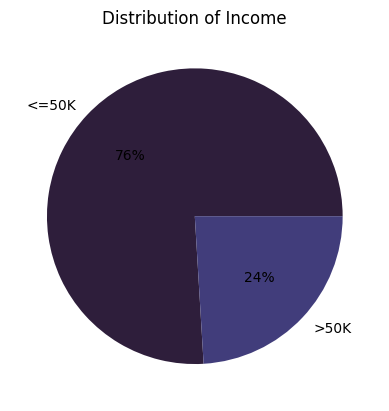

In [7]:
#univariate - single variable -> column

#target variable -> Income
income = dict(data["income"].value_counts())
palette = sns.color_palette("mako")
plt.pie(income.values(), labels=income.keys(), colors = palette, autopct = "%.0f%%")
plt.title("Distribution of Income")
plt.show();

In [8]:
#visualize the race -> what are we dealing with?
race = data['race'].value_counts().reset_index()
race.columns = ["race", "count"]
fig = px.pie(race, names = "race", values = "count", title = "Distribution of race")
fig.show()

In [9]:
#data["relationship"].value_counts()
#visualizing relationships
relate = data["relationship"].value_counts().reset_index()
relate.columns = ["relationship", "count"]
fig = px.pie(relate, names = "relationship", values = "count", hole = 0.3,
             title = "Distribution of Relationship")

fig.update_traces(textinfo = "percent+label", pull = 0.05)
fig.show();

In [ ]:
data["sex"].value_counts()

In [ ]:
#bivariate -> two variables

#visualize gender by income
plt.figure(figsize = (8,6))
sns.countplot(data, x = "sex", hue = "income", palette = "rocket")
plt.title("Gender Distribution by Income")
plt.show();

In [ ]:
data.columns

In [ ]:
#education by income
plt.figure(figsize = (8,6))
sns.countplot(data, x = "education", hue = "income")
plt.title("Distribution of Education by Income")
plt.xticks(rotation = 45)

In [ ]:
data.columns

In [ ]:
data["occupation"].value_counts()

In [ ]:
data.columns

In [ ]:
#multivariate analysis
#age, education.num, finalweight

fig = px.scatter_3d(
    data,
    x = "age",
    y = "education.num",
    z = "fnlwgt",
    color = "income",
    color_discrete_map= {"<=50K": "brown", ">50K":"yellow"},
    title = "Age, Education, Final Weight by Income"
)

fig.show();

In [ ]:
#age vs income
plt.figure(figsize = (8, 6))
sns.scatterplot(data, x = "income", y = "age")
plt.title("Age vs Income")
plt.show()

## **Model Building**

In [11]:
num_cols = data.select_dtypes(exclude = "object").columns.to_list()
num_cols

['age', 'fnlwgt', 'education.num']

In [12]:
cat = data.select_dtypes(exclude = "int64").columns.to_list()
cat.remove("income")

In [32]:
cat

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [13]:
scaler = StandardScaler() #for scaling numerical columns

In [15]:
#encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["income"] = label.fit_transform(data["income"])
data["sex"] = label.fit_transform(data["sex"])

In [16]:
data = pd.get_dummies(data, drop_first = True)

In [17]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [18]:
data.head()

,age,fnlwgt,education.num,sex,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,-1.580726,-0.389673,-1.199017,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,-1.580726,-0.912457,-0.808604,0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.580726,-0.045463,-1.979843,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,-1.580726,-0.691276,-1.199017,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.580726,0.191169,-1.199017,0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
#independent and dependent
X = data.drop("income", axis = 1)
y = data["income"]


#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [20]:
#model selection -> decision trees, SVC, lgbclassifier, logistic regression

#svc -> 1
svc = SVC()

#model training
svc.fit(X_train, y_train)

SVC()

In [21]:
#predictions -> SVC
svc_preds = svc.predict(X_test)

#evaluations
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4853
           1       0.71      0.53      0.60      1537

    accuracy                           0.83      6390
   macro avg       0.79      0.73      0.75      6390
weighted avg       0.83      0.83      0.83      6390



In [23]:
#model 2 -> lgbclassifier
lgb = LGBMClassifier(n_estimators=80, max_depth = 8, random_state = 42)

lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6146, number of negative: 19411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 25557, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240482 -> initscore=-1.150038
[LightGBM] [Info] Start training from score -1.150038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=8, n_estimators=80, random_state=42)

In [24]:
#predictions -> lgb
lgb_preds = lgb.predict(X_test)

#evaluation
print(classification_report(y_test, lgb_preds))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4853
           1       0.71      0.57      0.63      1537

    accuracy                           0.84      6390
   macro avg       0.79      0.75      0.76      6390
weighted avg       0.83      0.84      0.83      6390



In [25]:
#model 3 -> decision tree
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(X_train, y_train )

DecisionTreeClassifier(random_state=42)

In [26]:
#predictions -> dtc
dtc_preds = dtc.predict(X_test)

#evaluation
print(classification_report(y_test, dtc_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4853
           1       0.52      0.52      0.52      1537

    accuracy                           0.77      6390
   macro avg       0.68      0.68      0.68      6390
weighted avg       0.77      0.77      0.77      6390



In [27]:
#final model -> logistic regression
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [28]:
#predictions -> lg
lg_preds = lg.predict(X_test)

#evaluation
print(classification_report(y_test, lg_preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4853
           1       0.69      0.54      0.61      1537

    accuracy                           0.83      6390
   macro avg       0.77      0.73      0.75      6390
weighted avg       0.82      0.83      0.82      6390

